In [1]:
from sodapy import Socrata

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
client = Socrata("analisi.transparenciacatalunya.cat", None)
results = client.get("q2sg-894k", limit=150000) 

In [3]:
mapa = "./data/map.geojson"
map_data = gpd.read_file(mapa)
map_data

,nom_prov,provincia,sup_prov,geometry
0,Lleida,25,12167.69,"MULTIPOLYGON (((1.38527 41.60300, 1.39356 41.5..."
1,Barcelona,08,7730.29,"MULTIPOLYGON (((1.40733 41.60033, 1.39356 41.5..."
2,Girona,17,5903.45,"MULTIPOLYGON (((3.11670 42.14556, 3.11678 42.1..."
3,Tarragona,43,6306.68,"MULTIPOLYGON (((1.02329 41.05217, 1.02324 41.0..."


In [4]:
pop = pd.read_excel("./data/pop.xls")
pop

,2021,2020,2019,2018,2017,2016,2015,2014,2013
0,435186,434613,430255,427718,427833,428183,429870,431375,435713
1,5690752,5703334,5627752,5571822,5533459,5489294,5463907,5462583,5492356
2,769274,765554,755396,747157,742728,739607,738976,743352,748341
3,821548,818702,806091,797128,792256,791248,792001,796584,802558


In [5]:
results_pd = pd.DataFrame(data=results)
results_pd

,data,any,duradasegons,diasetmana,mes,hora,llengua,comarca,ambitterritorial,provincia,...,xarxa_b,derivacio_c,xarxa_c,emergencia,detallprofessional,relacioagressorambitlaboral,traduccio,idiomatraduccio,situaciofillsfilles_a,nombrefillsfilles_a
0,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T01:00:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T06:33:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T11:57:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01T00:00:00.000,2013,Entre 15 i 30 minuts,Dimarts,Gener,1899-12-31T21:52:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T01:06:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106361,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,15:15:32,Català,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106362,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,16:18:46,Castellà,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106363,2021-10-31T00:00:00.000,2021,Entre 5 i 15 minuts,Diumenge,Octubre,16:33:54,Castellà,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
106364,2021-10-31T00:00:00.000,2021,Més de 30 minuts,Diumenge,Octubre,17:14:04,Català,Barcelonès,Metropolità,No consta,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
intensity = np.zeros((4, 9))
years = 2013
i = 0
for index, row in results_pd.iterrows():
    if row['any'] == str(years):
        if row["provincia"] == "Lleida":
            intensity[0][i] += 1
        elif row["provincia"] == "Barcelona":
            intensity[1][i] += 1
        elif row["provincia"] == "Girona":
            intensity[2][i] += 1
        elif row["provincia"] == "Tarragona":
            intensity[3][i] += 1
    else:
        i += 1
        years += 1
print(intensity)

[[  507.   428.   451.   433.   412.   449.   392.   517.   340.]
 [ 9296.  8881.  9839.  9408.  8693.  8325.  8370. 10660.  8194.]
 [  892.   831.   810.   803.   758.   698.   761.   925.   736.]
 [ 1137.  1045.  1183.  1234.  1182.  1070.  1047.  1303.  1058.]]


In [7]:
inten_2013 = pd.DataFrame(data=intensity)
inten_2013 = inten_2013.rename(
    columns={
        0: 2013,
        1: 2014,
        2: 2015,
        3: 2016,
        4: 2017,
        5: 2018,
        6: 2019,
        7: 2020,
        8: 2021
    }
)
inten_2013

,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,507.0,428.0,451.0,433.0,412.0,449.0,392.0,517.0,340.0
1,9296.0,8881.0,9839.0,9408.0,8693.0,8325.0,8370.0,10660.0,8194.0
2,892.0,831.0,810.0,803.0,758.0,698.0,761.0,925.0,736.0
3,1137.0,1045.0,1183.0,1234.0,1182.0,1070.0,1047.0,1303.0,1058.0


In [8]:
a = inten_2013[2013].value_counts()
b = inten_2013.values
print(b)

[[  507.   428.   451.   433.   412.   449.   392.   517.   340.]
 [ 9296.  8881.  9839.  9408.  8693.  8325.  8370. 10660.  8194.]
 [  892.   831.   810.   803.   758.   698.   761.   925.   736.]
 [ 1137.  1045.  1183.  1234.  1182.  1070.  1047.  1303.  1058.]]


In [9]:
c = pop[2013].value_counts()
d = pop.values

print(d)

[[ 435186  434613  430255  427718  427833  428183  429870  431375  435713]
 [5690752 5703334 5627752 5571822 5533459 5489294 5463907 5462583 5492356]
 [ 769274  765554  755396  747157  742728  739607  738976  743352  748341]
 [ 821548  818702  806091  797128  792256  791248  792001  796584  802558]]


In [10]:
ab = 10**6 * b / d
ab_pd = pd.DataFrame(data=ab)
print(ab_pd)

             0            1            2            3            4  \
0  1165.019095   984.784164  1048.215593  1012.349258   962.992570   
1  1633.527520  1557.159374  1748.300209  1688.496151  1570.988418   
2  1159.534834  1085.488418  1072.285265  1074.740650  1020.562036   
3  1383.972695  1276.410709  1467.576241  1548.057527  1491.941999   

             5            6            7            8  
0  1048.617063   911.903599  1198.493190   780.330171  
1  1516.588472  1531.870876  1951.457763  1491.891640  
2   943.744448  1029.803404  1244.363370   983.508855  
3  1352.294097  1321.968028  1635.734587  1318.284784  


In [11]:
prov = ['Lleida', 'Barcelona', 'Girona', 'Tarragona']
ab_pd.insert(
    loc=0,
    column='nom_prov',
    value=prov
)
ab_pd

,nom_prov,0,1,2,3,4,5,6,7,8
0,Lleida,1165.019095,984.784164,1048.215593,1012.349258,962.992570,1048.617063,911.903599,1198.493190,780.330171
1,Barcelona,1633.527520,1557.159374,1748.300209,1688.496151,1570.988418,1516.588472,1531.870876,1951.457763,1491.891640
2,Girona,1159.534834,1085.488418,1072.285265,1074.740650,1020.562036,943.744448,1029.803404,1244.363370,983.508855
3,Tarragona,1383.972695,1276.410709,1467.576241,1548.057527,1491.941999,1352.294097,1321.968028,1635.734587,1318.284784


In [12]:
map_data = map_data.merge(ab_pd, on='nom_prov')
map_data.head()

,nom_prov,provincia,sup_prov,geometry,0,1,2,3,4,5,6,7,8
0,Lleida,25,12167.69,"MULTIPOLYGON (((1.38527 41.60300, 1.39356 41.5...",1165.019095,984.784164,1048.215593,1012.349258,962.992570,1048.617063,911.903599,1198.493190,780.330171
1,Barcelona,08,7730.29,"MULTIPOLYGON (((1.40733 41.60033, 1.39356 41.5...",1633.527520,1557.159374,1748.300209,1688.496151,1570.988418,1516.588472,1531.870876,1951.457763,1491.891640
2,Girona,17,5903.45,"MULTIPOLYGON (((3.11670 42.14556, 3.11678 42.1...",1159.534834,1085.488418,1072.285265,1074.740650,1020.562036,943.744448,1029.803404,1244.363370,983.508855
3,Tarragona,43,6306.68,"MULTIPOLYGON (((1.02329 41.05217, 1.02324 41.0...",1383.972695,1276.410709,1467.576241,1548.057527,1491.941999,1352.294097,1321.968028,1635.734587,1318.284784


In [13]:
map_data = map_data.rename(
    columns={
        0: 2013,
        1: 2014,
        2: 2015,
        3: 2016,
        4: 2017,
        5: 2018,
        6: 2019,
        7: 2020,
        8: 2021
    }
)
map_data

,nom_prov,provincia,sup_prov,geometry,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Lleida,25,12167.69,"MULTIPOLYGON (((1.38527 41.60300, 1.39356 41.5...",1165.019095,984.784164,1048.215593,1012.349258,962.992570,1048.617063,911.903599,1198.493190,780.330171
1,Barcelona,08,7730.29,"MULTIPOLYGON (((1.40733 41.60033, 1.39356 41.5...",1633.527520,1557.159374,1748.300209,1688.496151,1570.988418,1516.588472,1531.870876,1951.457763,1491.891640
2,Girona,17,5903.45,"MULTIPOLYGON (((3.11670 42.14556, 3.11678 42.1...",1159.534834,1085.488418,1072.285265,1074.740650,1020.562036,943.744448,1029.803404,1244.363370,983.508855
3,Tarragona,43,6306.68,"MULTIPOLYGON (((1.02329 41.05217, 1.02324 41.0...",1383.972695,1276.410709,1467.576241,1548.057527,1491.941999,1352.294097,1321.968028,1635.734587,1318.284784


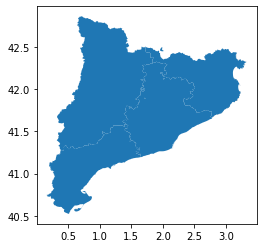

In [16]:
_ = map_data.plot()

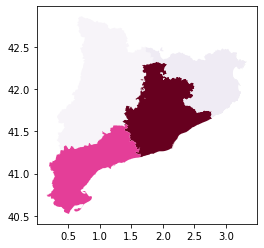

In [17]:
_ = map_data.plot(column=2020, cmap='PuRd')

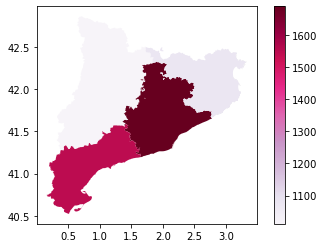

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)
_ = map_data.plot(column=2016, ax=ax, legend=True, cmap='PuRd')
# plt.savefig("./data/img_4.jpeg")

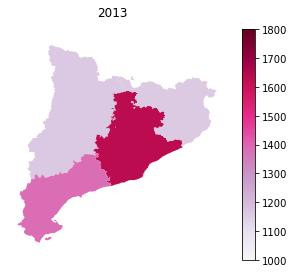

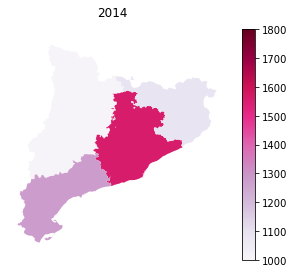

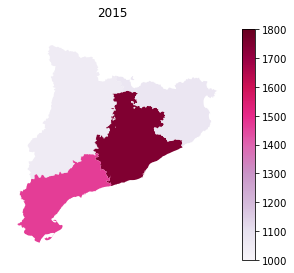

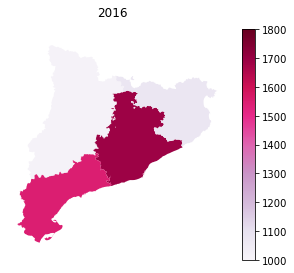

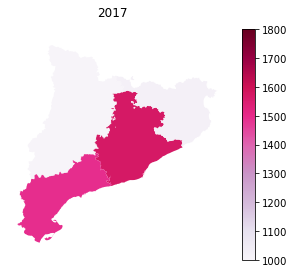

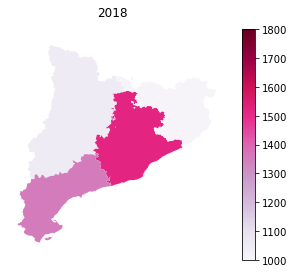

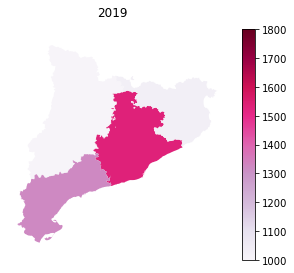

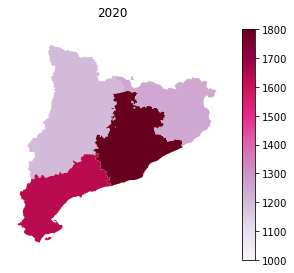

In [21]:
from matplotlib.pyplot import figure

vmin, vmax = 1000, 1800
for i in range(2013, 2021):
    ax = map_data.plot(
        column=i,
        cmap='PuRd',
        vmin=vmin,
        vmax=vmax
    )
    ax.set_axis_off()
    # add colorbar
    fig = ax.get_figure()
    cax = fig.add_axes([0.80, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(
        cmap='PuRd',
        norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    # fake up the array of the scalar mappable.
    sm._A = []
    fig.colorbar(sm, cax=cax)
    fig.suptitle(f"{i}")
    # plt.savefig(f"./data/img_{i}.jpeg", dpi=150)

# GIF

```python
import glob
from PIL import Image

# filepaths
fp_in = "./data/*.jpeg"
fp_out = "./data/animated_map.gif"

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(
    fp=fp_out,
    format='GIF',
    append_images=imgs,
    save_all=True,
    duration=1500,
    loop=0
)
```

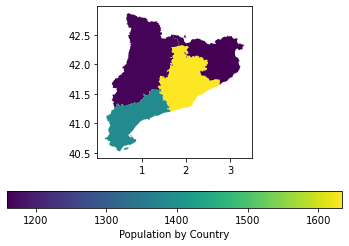

In [23]:
fig, ax = plt.subplots(1, 1)

_ = map_data.plot(
    column=2013,
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Population by Country",
        "orientation": "horizontal"
    }
)

In [24]:
comarques = "./data/catalonia_map.geojson"
comarques_pd = gpd.read_file(comarques)

In [25]:
primer = "Ribera d'Ebre"
com_1 = ["Ribera d'Ebre"]
for index, row in comarques_pd.iterrows():
    prueba = row["nom_comar"]
    if ((prueba != primer) and (prueba not in com_1)):
        com_1.append(prueba)

In [26]:
primer = "Barcelonès"
com = ["Barcelonès"]
for index, row in results_pd.iterrows():
    prueba = row["comarca"]
    if ((prueba != primer) and (prueba not in com)):
        com.append(prueba)

In [27]:
dct = {comarca: [0, 0, 0, 0, 0, 0, 0, 0, 0] for comarca in com}

In [28]:
i = 0
years = 2013
for index, row in results_pd.iterrows():
    if row['any'] == str(years):
        dct[row["comarca"]][i] += 1
    else:
        i += 1
        years += 1

In [33]:
reordered_dct = {k: dct[k] for k in com_1}
reordered_dct = pd.DataFrame(data=reordered_dct)
reordered_dct = reordered_dct.T
reordered_dct['nom_comar'] = reordered_dct.index
reordered_dct = reordered_dct.rename(
    columns={
        0: "2013_n",
        1: "2014_n",
        2: "2015_n",
        3: "2016_n",
        4: "2017_n",
        5: "2018_n",
        6: "2019_n",
        7: "2020_n",
        8: "2021_n"
    }
)

In [36]:
pob_com = pd.read_excel("./data/population.xls")
pob_com.set_index('Unnamed: 0', inplace=True)
pob_com = pob_com.T
pob_com_dct = pob_com.to_dict()
pob_com_dct_ord = {k: pob_com_dct[k] for k in com_1}
pob_com_dct = pd.DataFrame(data=pob_com_dct_ord)
pob_com_dct = pob_com_dct.T
pob_com_dct['nom_comar'] = pob_com_dct.index

pob_com_dct = pob_com_dct.merge(reordered_dct, on='nom_comar')

In [37]:
for year in range(2013, 2021):
    pob_com_dct[year] = (10**6 * pob_com_dct[f"{year}_n"]
                         / pob_com_dct[year]).astype(int)

In [38]:
comarques_pd = comarques_pd.merge(pob_com_dct, on='nom_comar')
comarques_pd

,cartodb_id,comarca,provincia,nom_comar,sup_comar,geometry,2013,2014,2015,2016,...,2020,2013_n,2014_n,2015_n,2016_n,2017_n,2018_n,2019_n,2020_n,2021_n
0,1,30,43,Ribera d'Ebre,827.44,"MULTIPOLYGON (((0.49484 41.19658, 0.49420 41.1...",348,619,357,452,...,785,8,14,8,10,6,2,7,17,0
1,2,22,43,Montsià,734.10,"MULTIPOLYGON (((0.23415 40.77959, 0.23550 40.7...",510,418,615,912,...,997,36,29,42,62,54,25,54,69,37
2,4,25,25,Pallars Jussà,1343.08,"MULTIPOLYGON (((0.92165 42.48490, 0.92162 42.4...",889,302,149,455,...,153,12,4,2,6,6,6,6,2,3
3,5,26,25,Pallars Sobirà,1377.92,"MULTIPOLYGON (((0.96112 42.63141, 0.96103 42.6...",275,279,143,434,...,724,2,2,1,3,5,5,5,5,9
4,6,27,25,Pla d'Urgell,305.05,"MULTIPOLYGON (((0.86595 41.72429, 0.86519 41.7...",515,273,381,408,...,617,19,10,14,15,13,28,22,23,0
5,7,6,08,Anoia,866.38,"MULTIPOLYGON (((1.42447 41.73267, 1.42472 41.7...",1194,1047,999,1099,...,1340,141,123,117,129,122,107,136,165,132
6,8,7,08,Bages,1092.42,"MULTIPOLYGON (((1.98584 41.92424, 1.98544 41.9...",917,820,1091,1137,...,1121,169,150,189,197,161,128,129,201,172
7,9,4,25,Alt Urgell,1447.50,"MULTIPOLYGON (((1.16524 42.21967, 1.16487 42.2...",762,578,291,636,...,649,16,12,6,13,11,4,7,13,15
8,10,5,25,Alta Ribagorça,426.87,"MULTIPOLYGON (((0.82620 42.60515, 0.82805 42.6...",247,0,0,259,...,0,1,0,0,1,0,0,1,0,4
9,11,8,43,Baix Camp,696.93,"MULTIPOLYGON (((0.93547 41.32045, 0.93644 41.3...",1148,1031,998,1074,...,1126,220,196,188,203,238,195,177,220,212


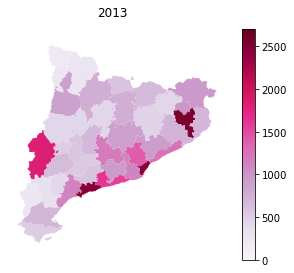

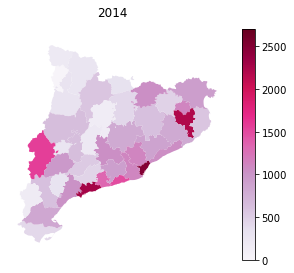

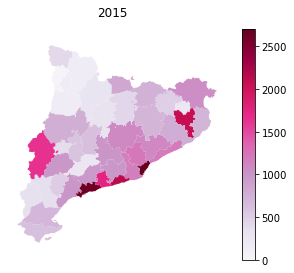

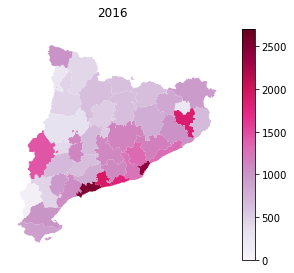

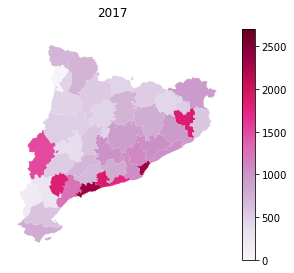

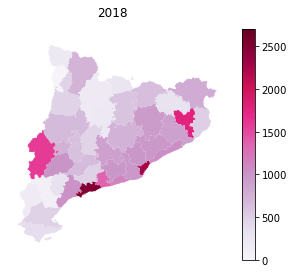

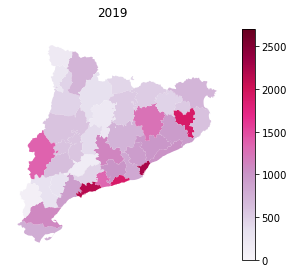

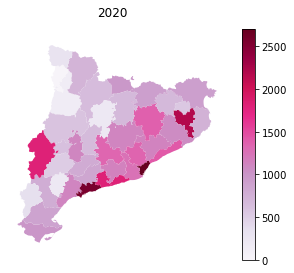

In [40]:
from matplotlib.pyplot import figure

vmin, vmax = 0, 2700
for i in range(2013, 2021):
    ax = comarques_pd.plot(
        column=i,
        cmap='PuRd',
        vmin=vmin,
        vmax=vmax
    )
    ax.set_axis_off()
    # add colorbar
    fig = ax.get_figure()
    cax = fig.add_axes([0.80, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(
        cmap='PuRd',
        norm=plt.Normalize(vmin=vmin, vmax=vmax)
    )
    # fake up the array of the scalar mappable.
    sm._A = []
    fig.colorbar(sm, cax=cax)
    fig.suptitle(f"{i}")
    # plt.savefig(f"./data/img_{i}_c.jpeg", dpi=150)

# GIF

```python
import glob
from PIL import Image

# filepaths
fp_in = "./data/*_c.jpeg"
fp_out = "./data/animated_full_map.gif"

img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(
    fp=fp_out,
    format='GIF',
    append_images=imgs,
    save_all=True,
    duration=1500,
    loop=0
)
```